In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [28]:
host="am"
base_dir = "/u/scratch/r/rwolff/Poyet_midas_output/%s" % host
samples=pd.read_csv("metagenomic_data_files/%s_samples.txt" % host).values
samples = np.ravel(samples)

In [30]:
rel_ab = {}
cov = {}
for sample in samples:
    try:
        df = pd.read_csv("%s/%s/species/species_profile.txt" % (base_dir,sample),index_col=0,sep="\t")
        rel_ab[sample] = df["relative_abundance"]
        cov[sample] = df["coverage"]
        
    except:
        print(sample)
        pass

SRR9224523c
SRR9224285c
SRR9224476


In [31]:
df_rel_ab=pd.DataFrame(data=rel_ab, index=rel_ab[list(rel_ab.keys())[0]].index)
df_cov=pd.DataFrame(data=cov, index=cov[list(cov.keys())[0]].index)

<AxesSubplot:>

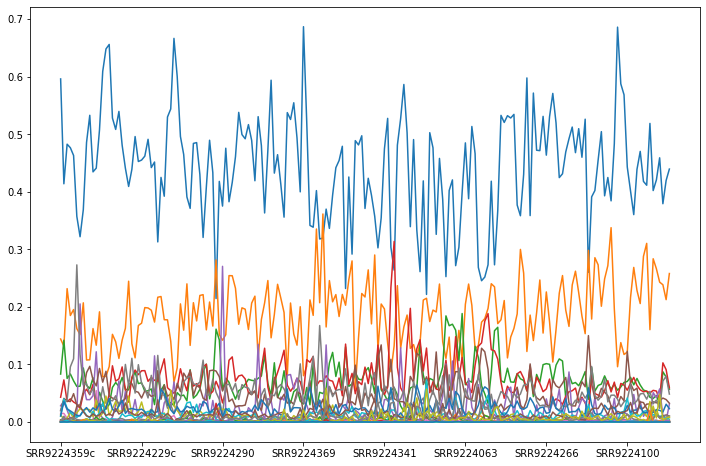

In [32]:
fig,ax = plt.subplots(figsize=(12,8))
df_rel_ab.T.plot(legend=None,ax=ax)

In [34]:
df_rel_ab

,SRR9224359c,SRR9224362,SRR9224245,SRR9224364,SRR9224363c,SRR9224365,SRR9224525,SRR9224526,SRR9224529c,SRR9224527c,...,SRR9224103,SRR9224108,SRR9224107,SRR9224261,SRR9224319,SRR9224198,SRR9224199,SRR9224204,SRR9224205,SRR9224202
species_id,,,,,,,,,,,,,,,,,,,,,
Bacteroides_vulgatus,0.596067,0.413897,0.482689,0.476549,0.463061,0.357300,0.321931,0.368910,0.485654,0.532907,...,0.470175,0.418033,0.411373,0.518778,0.402163,0.420704,0.459053,0.379273,0.419717,0.439488
Bacteroides_uniformis,0.144224,0.131780,0.231767,0.185024,0.195410,0.162276,0.151865,0.207104,0.107760,0.108056,...,0.205825,0.287865,0.310394,0.160477,0.283655,0.266177,0.243033,0.238513,0.212623,0.257997
Bacteroides_ovatus,0.083326,0.142027,0.075820,0.083531,0.071524,0.061816,0.062239,0.093936,0.063898,0.058180,...,0.064253,0.055701,0.053360,0.043004,0.040955,0.046066,0.031099,0.087334,0.078194,0.056960
Bacteroides_xylanisolvens,0.043074,0.073198,0.035357,0.040235,0.034792,0.031366,0.023318,0.049273,0.057056,0.047479,...,0.055972,0.052528,0.053746,0.050594,0.055032,0.053812,0.038700,0.102830,0.091021,0.059590
Ruminococcus_bromii,0.028186,0.036149,0.020781,0.005701,0.010054,0.007975,0.205199,0.064822,0.038912,0.038816,...,0.036058,0.009902,0.018810,0.006093,0.051119,0.042147,0.057524,0.010843,0.002109,0.030905
Bacteroides_stercoris,0.019630,0.041140,0.036479,0.035552,0.049353,0.029288,0.029487,0.052479,0.085843,0.096800,...,0.023039,0.024201,0.031108,0.031440,0.035228,0.033267,0.037189,0.041626,0.039056,0.032703
Bifidobacterium_adolescentis,0.014778,0.014934,0.006540,0.001013,0.004884,0.000379,0.001385,0.001676,0.001611,0.001888,...,0.000000,0.000137,0.000280,0.000793,0.001641,0.000954,0.001180,0.001101,0.000233,0.000364
Parabacteroides_merdae,0.020806,0.031830,0.038073,0.095873,0.109857,0.273015,0.117339,0.065502,0.066628,0.048372,...,0.048793,0.049803,0.039740,0.053213,0.031613,0.038170,0.023728,0.071184,0.079680,0.048573
Parasutterella_excrementihominis,0.012325,0.004936,0.006735,0.016779,0.006091,0.015995,0.023365,0.020203,0.022456,0.021437,...,0.008435,0.017202,0.009454,0.035741,0.005083,0.021918,0.006143,0.005177,0.003652,0.008004


Here, set minimum mean coverage for a species to be considered for further downstream analyses

Is this necessary? 

In [7]:
min_thresh=0
df = df_cov.loc[df_cov.T.mean() > min_thresh]

In [8]:
pd.Series(df.index).to_csv("/u/scratch/r/rwolff/Poyet_species_unions/%s_species_union.txt" % host,index=None,header=None)